<a href="https://colab.research.google.com/github/no-way02/WIDS-IPL/blob/main/WEEK_1_and_WEEK_2_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import altair as alt

cm = sns.light_palette("blue", as_cmap=True)

In [ ]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

## Matches Basics

In [ ]:
#reading file from drive
df1 = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/matches.csv', error_bad_lines=False)

In [ ]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Deliveries Basics


In [ ]:
#reading file from drive
df2 = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/deliveries.csv', error_bad_lines=False)

In [ ]:
df1.shape

(756, 18)

In [ ]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

##DATA PREPROCESSING

In [ ]:
#Filing missing city name
conditions = [df1["venue"] == "Rajiv Gandhi International Stadium, Uppal",df1["venue"] == "Maharashtra Cricket Association Stadium",
              df1["venue"] == "Saurashtra Cricket Association Stadium", df1["venue"] == "Holkar Cricket Stadium",
              df1["venue"] == "M Chinnaswamy Stadium",df1["venue"] == "Wankhede Stadium",
              df1["venue"] == "Eden Gardens",df1["venue"] == "Feroz Shah Kotla",
              df1["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",df1["venue"] == "Green Park",
              df1["venue"] == "Punjab Cricket Association Stadium, Mohali",df1["venue"] == "Dr DY Patil Sports Academy",
              df1["venue"] == "Sawai Mansingh Stadium", df1["venue"] == "MA Chidambaram Stadium, Chepauk", 
              df1["venue"] == "Newlands", df1["venue"] == "St George's Park" , 
              df1["venue"] == "Kingsmead", df1["venue"] == "SuperSport Park",
              df1["venue"] == "Buffalo Park", df1["venue"] == "New Wanderers Stadium",
              df1["venue"] == "De Beers Diamond Oval", df1["venue"] == "OUTsurance Oval", 
              df1["venue"] == "Brabourne Stadium",df1["venue"] == "Sardar Patel Stadium", 
              df1["venue"] == "Barabati Stadium", df1["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              df1["venue"] == "Himachal Pradesh Cricket Association Stadium",df1["venue"] == "Nehru Stadium",
              df1["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",df1["venue"] == "Subrata Roy Sahara Stadium",
              df1["venue"] == "Shaheed Veer Narayan Singh International Stadium",df1["venue"] == "JSCA International Stadium Complex",
              df1["venue"] == "Sheikh Zayed Stadium",df1["venue"] == "Sharjah Cricket Stadium",
              df1["venue"] == "Dubai International Cricket Stadium",df1["venue"] == "M. A. Chidambaram Stadium",
              df1["venue"] == "Feroz Shah Kotla Ground",df1["venue"] == "M. Chinnaswamy Stadium",
              df1["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,df1["venue"] == "IS Bindra Stadium",df1["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
df1['city'] = np.where(df1['city'].isnull(),
                              np.select(conditions, values),
                              df1['city'])


In [ ]:
df1['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
#unique team names
print(df1['team1'].unique())
print(df1['team2'].nunique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
15


In [ ]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df1['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)
df1['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)
df1['toss_winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)
df1['winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant',inplace=True)

In [ ]:
#Dropping columns with missing winner values
df1 = df1[df1['winner'].notna()]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoderTeam = LabelEncoder()
# Assigning numerical values to teams and storing in another column 
df1['team1'] = labelencoderTeam.fit_transform(df1['team1'])
df1['team2'] = labelencoderTeam.fit_transform(df1['team2'])
df1['toss_winner'] = labelencoderTeam.fit_transform(df1['toss_winner'])
df1['winner'] = labelencoderTeam.fit_transform(df1['winner'])
# Assigning numerical values to venues and storing in another column 
labelencoderVenue = LabelEncoder()
df1["venue"]=labelencoderVenue.fit_transform(df1["venue"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
# Saving label encoded values
le_team_mapping = dict(zip(labelencoderTeam.classes_, labelencoderTeam.transform(labelencoderTeam.classes_)))
print(le_team_mapping)

le_venue_mapping = dict(zip(labelencoderVenue.classes_, labelencoderVenue.transform(labelencoderVenue.classes_)))
print(le_venue_mapping)

{'Chennai Super Kings': 0, 'Deccan Chargers': 1, 'Delhi Capitals': 2, 'Delhi Daredevils': 3, 'Gujarat Lions': 4, 'Kings XI Punjab': 5, 'Kochi Tuskers Kerala': 6, 'Kolkata Knight Riders': 7, 'Mumbai Indians': 8, 'Pune Warriors': 9, 'Rajasthan Royals': 10, 'Rising Pune Supergiant': 11, 'Royal Challengers Bangalore': 12, 'Sunrisers Hyderabad': 13}
{'ACA-VDCA Stadium': 0, 'Barabati Stadium': 1, 'Brabourne Stadium': 2, 'Buffalo Park': 3, 'De Beers Diamond Oval': 4, 'Dr DY Patil Sports Academy': 5, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6, 'Dubai International Cricket Stadium': 7, 'Eden Gardens': 8, 'Feroz Shah Kotla': 9, 'Feroz Shah Kotla Ground': 10, 'Green Park': 11, 'Himachal Pradesh Cricket Association Stadium': 12, 'Holkar Cricket Stadium': 13, 'IS Bindra Stadium': 14, 'JSCA International Stadium Complex': 15, 'Kingsmead': 16, 'M Chinnaswamy Stadium': 17, 'M. A. Chidambaram Stadium': 18, 'M. Chinnaswamy Stadium': 19, 'MA Chidambaram Stadium, Chepauk': 20, 'Maharashtra C

In [ ]:
#Colun umpire have most missing values
df1.drop(['umpire3'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#WEEK 2

### EDA_01


In [ ]:
#Mactches won by teams in each seasons
teams_each_season = df1.groupby('season')['winner'].value_counts()
teams_each_season

season  winner
2008    10        13
        5         10
        0          9
        3          7
        8          7
                  ..
2019    5          6
        7          6
        13         6
        10         5
        12         5
Name: winner, Length: 100, dtype: int64

In [ ]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [ ]:
win_count = []
win_team = []

for year in years:
  win_count.append(df1['winner'][df1['season']==year].value_counts().max())
  win_team.append(df1['winner'][df1['season']==year].value_counts().idxmax())


In [ ]:
#Copying into new dataframe
df_win = pd.DataFrame(years, columns=['seasons'])
df_win['win_team'] = pd.DataFrame(win_team)
df_win['win_count'] = pd.DataFrame(win_count)

In [ ]:
#Applying inverse on label incoder
df_win['win_team'] = labelencoderTeam.inverse_transform(df_win['win_team'])
df_win

,seasons,win_team,win_count
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Mumbai Indians,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


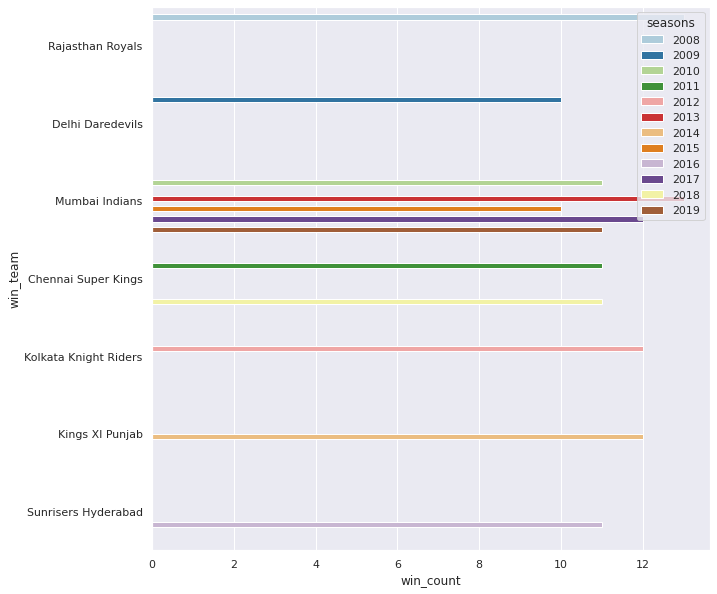

In [ ]:
#Bar Plot
sns.barplot(y = 'win_team', x = 'win_count', hue = 'seasons', data=df_win, palette='Paired');

1.   The team with most winning always played the final
2.   Mumbai indians won maximum number of matches more times than any other team (4 times)

###EDA_02

In [ ]:
venue = []
matches = []


venue = df1['venue'].value_counts().index
matches  = df1['venue'].value_counts().values

In [ ]:
#Copyting values in new dataframe
df_venue = pd.DataFrame([venue, matches]) #Each list would be added as a row
df_venue = df_venue.transpose() #To Transpose and make each rows as columns
df_venue.columns=['venue', 'matches'] #Rename the columns
df_venue['venue'] = labelencoderVenue.inverse_transform(df_venue['venue'])
df_venue.head(15)

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,71
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [ ]:
# Plot using plotly for top 10 values
most_matches_venue = [go.Bar(
    x = df_venue['venue'][0:10],
    y = df_venue['matches'][0:10],
    marker = dict(color = random_colors(len(df_venue['venue'])),line=dict(color='#000000', width=3))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Venue with most hosted matches',
                      xaxis = dict(title='Venue'),
                      yaxis = dict(title='Count'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data = most_matches_venue,layout = layout)
iplot(fig)

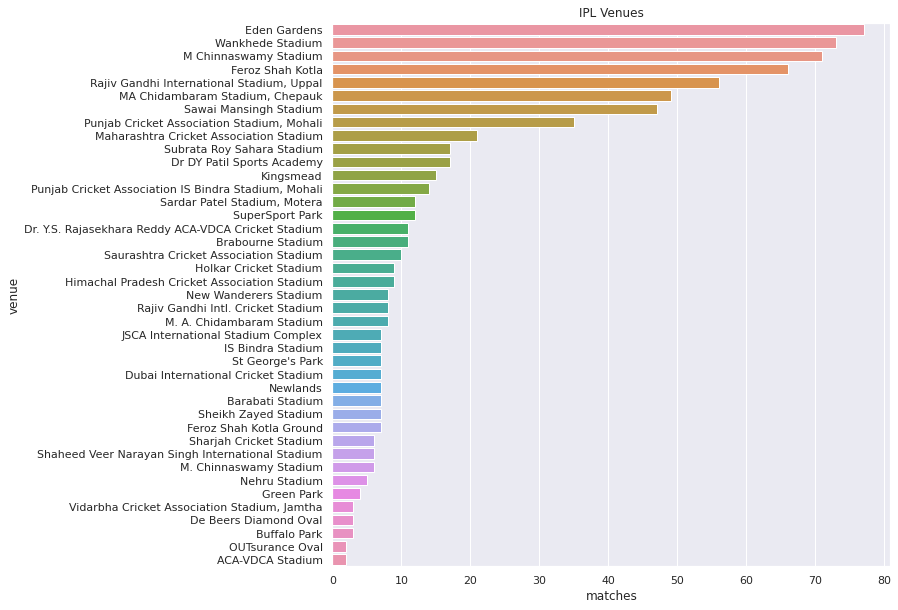

In [ ]:
#plot using seaborn
plt.title("IPL Venues")
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x='matches', y='venue', data=df_venue)

### EDA_03

In [ ]:
#win percentage calculation
team = []
win_perc = []


for i in range(0, 14):
  win_perc.append(100*df1[df1['winner']==i].shape[0]/(df1[df1['team1']==i].shape[0]+df1[df1['team2']==i].shape[0]))
  team.append(i)

win_perc

[60.97560975609756,
 38.666666666666664,
 62.5,
 42.138364779874216,
 43.333333333333336,
 46.59090909090909,
 42.857142857142854,
 51.68539325842696,
 58.288770053475936,
 26.666666666666668,
 51.724137931034484,
 50.0,
 47.45762711864407,
 53.7037037037037]

In [ ]:
#copying values into new dataframe
df_perc = pd.DataFrame([team, win_perc]) #Each list would be added as a row
df_perc = df_perc.transpose() #To Transpose and make each rows as columns
df_perc.columns=['team', 'win_perc'] #Rename the columns
df_perc['team'] =  pd.to_numeric(df_perc['team'], downcast='integer') 
df_perc['team'] = labelencoderTeam.inverse_transform(df_perc['team'])
df_perc

,team,win_perc
0,Chennai Super Kings,60.975610
1,Deccan Chargers,38.666667
2,Delhi Capitals,62.500000
3,Delhi Daredevils,42.138365
4,Gujarat Lions,43.333333
5,Kings XI Punjab,46.590909
6,Kochi Tuskers Kerala,42.857143
7,Kolkata Knight Riders,51.685393
8,Mumbai Indians,58.288770
9,Pune Warriors,26.666667


In [ ]:
# Plot using plotly
most_win_perc = [go.Bar(
    x = df_perc['team'],
    y = df_perc['win_perc'],
    marker = dict(color = random_colors(len(df_perc['team'])),line=dict(color='#000000', width=3))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most Win Percentage',
                      xaxis = dict(title='Teams'),
                      yaxis = dict(title='Wins'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data = most_win_perc,layout = layout)
iplot(fig)

###EDA_04

In [ ]:
most_mom_plot = [go.Bar(
    x = df1['player_of_match'].value_counts()[:20].index,
    y = df1['player_of_match'].value_counts()[:20].values,
    marker = dict(color = random_colors(20),line=dict(color='#000000', width=1.5))
)]


layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most Man of the Matches',
                      xaxis = dict(title='Players'),
                      yaxis = dict(title='MoM Awards'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)
 
fig = go.Figure(data=most_mom_plot, layout=layout)
iplot(fig)

###EDA_05

In [ ]:
team = []
win_toss = []


for i in range(0, 13):
  win_toss.append(100*df1[df1['toss_winner']==i].shape[0]/(df1[df1['team1']==i].shape[0]+df1[df1['team2']==i].shape[0]))
  team.append(i)

win_toss

[54.26829268292683,
 57.333333333333336,
 62.5,
 49.685534591194966,
 50.0,
 46.02272727272727,
 57.142857142857146,
 51.68539325842696,
 52.406417112299465,
 44.44444444444444,
 53.793103448275865,
 43.333333333333336,
 45.19774011299435]

In [ ]:
#copying values into new dataframe
df_toss = pd.DataFrame([team, win_toss]) #Each list would be added as a row
df_toss = df_toss.transpose() #To Transpose and make each rows as columns
df_toss.columns=['team', 'win_toss'] #Rename the columns
df_toss.team = df_toss.team.astype('int')
df_toss

,team,win_toss
0,0,54.268293
1,1,57.333333
2,2,62.500000
3,3,49.685535
4,4,50.000000
5,5,46.022727
6,6,57.142857
7,7,51.685393
8,8,52.406417
9,9,44.444444


In [ ]:
df_toss.team = labelencoderTeam.inverse_transform(df_toss['team'])
df_toss


,team,win_toss
0,Chennai Super Kings,54.268293
1,Deccan Chargers,57.333333
2,Delhi Capitals,62.500000
3,Delhi Daredevils,49.685535
4,Gujarat Lions,50.000000
5,Kings XI Punjab,46.022727
6,Kochi Tuskers Kerala,57.142857
7,Kolkata Knight Riders,51.685393
8,Mumbai Indians,52.406417
9,Pune Warriors,44.444444


In [ ]:
# Plot using plotly
toss_win_perc = [go.Bar(
    x = df_toss['team'],
    y = df_toss['win_toss'],
    marker = dict(color = random_colors(len(df_toss['team'])),line=dict(color='#000000', width=3))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Toss Win Percentage',
                      xaxis = dict(title='Teams'),
                      yaxis = dict(title='Wins'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data = toss_win_perc,layout = layout)
iplot(fig)

###EDA_06

In [ ]:
runs_margin = []
runs_margin = df1['win_by_runs'].value_counts().sort_values(ascending=True).head(10).index
print(runs_margin)

Int64Index([146, 98, 77, 93, 102, 87, 105, 111, 118, 138], dtype='int64')


In [ ]:
df_wbr = pd.DataFrame([runs_margin]) #Each list would be added as a row
df_wbr = df_wbr.transpose() #To Transpose and make each rows as columns
df_wbr.columns=['runs_margin'] #Rename the columns
df_wbr

,runs_margin
0,146
1,98
2,77
3,93
4,102
5,87
6,105
7,111
8,118
9,138


In [ ]:
#Creating the new Dataframe
team1 = []
team2 = []
for index, row in df1.iterrows():
    if(row['win_by_runs'] in runs_margin):
      
      # finding the winning team
      if row[4] == row[10]: 
        team1.append(row[4])
        team2.append(row[5])
      else:
        team2.append(row[4])
        team1.append(row[5])

df_wbr['team1'] = team1
df_wbr['team2'] = team2

df_wbr

,runs_margin,team1,team2
0,146,8,3
1,98,10,3
2,77,8,3
3,93,5,12
4,102,10,8
5,87,0,13
6,105,0,3
7,111,12,5
8,118,8,7
9,138,13,12


In [ ]:
#inversing the label encoded values
df_wbr['team1'] = labelencoderTeam.inverse_transform(df_wbr['team1'])
df_wbr['team2'] = labelencoderTeam.inverse_transform(df_wbr['team2'])

In [ ]:
df_wbr['index'] = (np.arange(1,len(df_wbr)+1).astype('str'))

In [ ]:
#separating matches invoving same teams
df_wbr['teams'] = df_wbr[['team1', 'team2','index']].agg('-'.join, axis=1)
df_wbr

,runs_margin,team1,team2,index,teams
0,146,Mumbai Indians,Delhi Daredevils,1,Mumbai Indians-Delhi Daredevils-1
1,98,Rajasthan Royals,Delhi Daredevils,2,Rajasthan Royals-Delhi Daredevils-2
2,77,Mumbai Indians,Delhi Daredevils,3,Mumbai Indians-Delhi Daredevils-3
3,93,Kings XI Punjab,Royal Challengers Bangalore,4,Kings XI Punjab-Royal Challengers Bangalore-4
4,102,Rajasthan Royals,Mumbai Indians,5,Rajasthan Royals-Mumbai Indians-5
5,87,Chennai Super Kings,Sunrisers Hyderabad,6,Chennai Super Kings-Sunrisers Hyderabad-6
6,105,Chennai Super Kings,Delhi Daredevils,7,Chennai Super Kings-Delhi Daredevils-7
7,111,Royal Challengers Bangalore,Kings XI Punjab,8,Royal Challengers Bangalore-Kings XI Punjab-8
8,118,Mumbai Indians,Kolkata Knight Riders,9,Mumbai Indians-Kolkata Knight Riders-9
9,138,Sunrisers Hyderabad,Royal Challengers Bangalore,10,Sunrisers Hyderabad-Royal Challengers Bangalor...


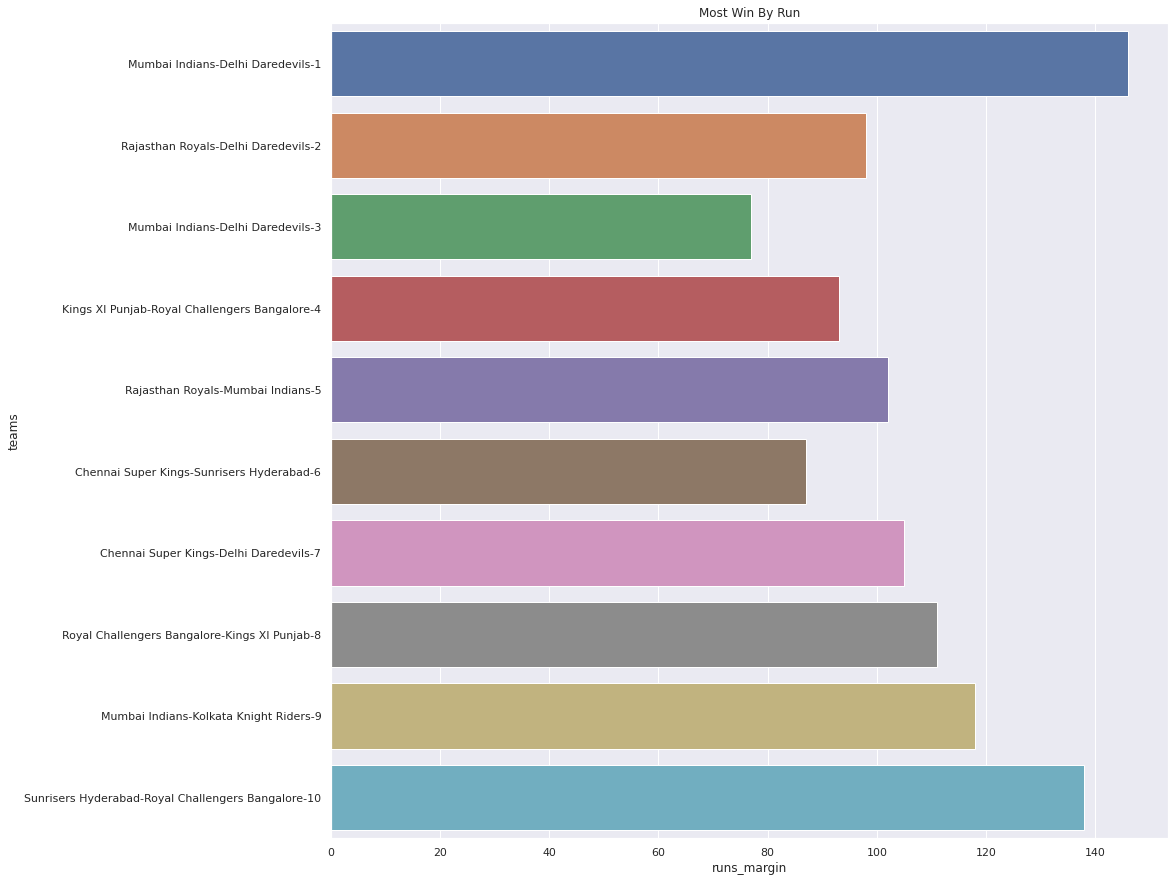

In [ ]:
#plot using seaborn
plt.title("Most Win By Run")
sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x='runs_margin', y='teams', data=df_wbr);

In [ ]:
wicket_margin = []
wicket_margin = df1['win_by_wickets'].value_counts().sort_values(ascending=True).head(10)
print(wicket_margin)

1      3
2      6
10    11
3     18
9     37
4     41
8     54
5     71
7     80
6     85
Name: win_by_wickets, dtype: int64


In [ ]:
#top ten victories by wicket is by 10 wickets only
wicket_margin=wicket_margin.index.max()

In [ ]:
df_wbw = pd.DataFrame() #Each list would be added as a row

In [ ]:
team1 = []
team2 = []
wicket_margin = []
for index, row in df1.iterrows():
    if(row['win_by_wickets'] == 10):
      #finding the winning team
      if row[4] == row[10]:
        team1.append(row[4])
        team2.append(row[5])
      else:
        team2.append(row[4])
        team1.append(row[5])
      
      wicket_margin.append(10)

df_wbw['team1'] = team1
df_wbw['team2'] = team2
df_wbw['wicket_margin'] = wicket_margin

df_wbw

,team1,team2,wicket_margin
0,7,4,10
1,5,3,10
2,1,8,10
3,3,5,10
4,12,10,10
5,10,8,10
6,8,10,10
7,0,5,10
8,12,3,10
9,13,4,10


In [ ]:
# inversing the label encoded values
df_wbw['team1'] = labelencoderTeam.inverse_transform(df_wbw['team1'])
df_wbw['team2'] = labelencoderTeam.inverse_transform(df_wbw['team2'])
df_wbw

,team1,team2,wicket_margin
0,Kolkata Knight Riders,Gujarat Lions,10
1,Kings XI Punjab,Delhi Daredevils,10
2,Deccan Chargers,Mumbai Indians,10
3,Delhi Daredevils,Kings XI Punjab,10
4,Royal Challengers Bangalore,Rajasthan Royals,10
5,Rajasthan Royals,Mumbai Indians,10
6,Mumbai Indians,Rajasthan Royals,10
7,Chennai Super Kings,Kings XI Punjab,10
8,Royal Challengers Bangalore,Delhi Daredevils,10
9,Sunrisers Hyderabad,Gujarat Lions,10


In [ ]:
# separating matches involving same teams
df_wbw['index'] = (np.arange(1,len(df_wbw)+1).astype('str'))
df_wbw['teams'] = df_wbw[['team1', 'team2','index']].agg('-'.join, axis=1)
df_wbw

,team1,team2,wicket_margin,index,teams
0,Kolkata Knight Riders,Gujarat Lions,10,1,Kolkata Knight Riders-Gujarat Lions-1
1,Kings XI Punjab,Delhi Daredevils,10,2,Kings XI Punjab-Delhi Daredevils-2
2,Deccan Chargers,Mumbai Indians,10,3,Deccan Chargers-Mumbai Indians-3
3,Delhi Daredevils,Kings XI Punjab,10,4,Delhi Daredevils-Kings XI Punjab-4
4,Royal Challengers Bangalore,Rajasthan Royals,10,5,Royal Challengers Bangalore-Rajasthan Royals-5
5,Rajasthan Royals,Mumbai Indians,10,6,Rajasthan Royals-Mumbai Indians-6
6,Mumbai Indians,Rajasthan Royals,10,7,Mumbai Indians-Rajasthan Royals-7
7,Chennai Super Kings,Kings XI Punjab,10,8,Chennai Super Kings-Kings XI Punjab-8
8,Royal Challengers Bangalore,Delhi Daredevils,10,9,Royal Challengers Bangalore-Delhi Daredevils-9
9,Sunrisers Hyderabad,Gujarat Lions,10,10,Sunrisers Hyderabad-Gujarat Lions-10


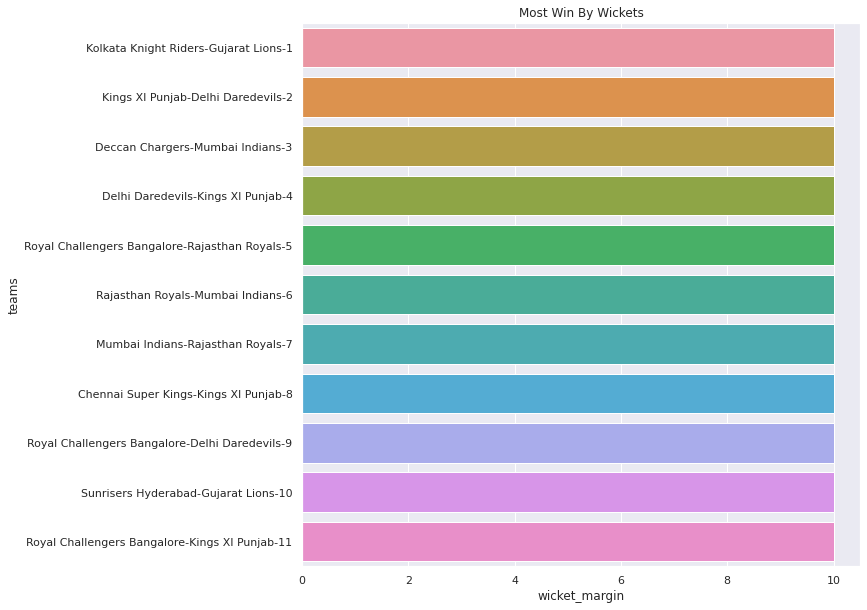

In [ ]:
#plot using seaborn
#all values have 10 wickets value
plt.title("Most Win By Wickets")
sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x='wicket_margin', y='teams', data=df_wbw);


### EDA_07


In [ ]:
# Creating dataframe with values of centuries by each player
cen = df2.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()

half_cen = df2.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()

df_cen = pd.merge(cen,half_cen, on='batsman',how='right')
df_cen = df_cen.fillna(0)

df_cen

,batsman,count_x,count_y
0,DA Warner,4.0,44
1,V Kohli,5.0,38
2,SK Raina,1.0,38
3,S Dhawan,0.0,37
4,RG Sharma,1.0,36
...,...,...,...
144,S Vidyut,0.0,1
145,SA Yadav,0.0,1
146,DJ Hooda,0.0,1
147,LA Pomersbach,0.0,1


In [ ]:
#strike rate dataframe
df_strike_rate = df2.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)
df_strike_rate

,ball,strike rate
batsman,,
B Stanlake,2,2.500000
Umar Gul,19,2.052632
RS Sodhi,2,2.000000
S Sharma,4,2.000000
AD Russell,803,1.799502
...,...,...
L Ablish,2,0.000000
Abdur Razzak,2,0.000000
V Pratap Singh,1,0.000000


In [ ]:
# statistics of batsmen
df_runs_per_match = df2.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_total_runs

,match count,average score,batsman run
batsman,,,
A Ashish Reddy,23,12.173913,280
A Chandila,2,2.000000,4
A Chopra,6,8.833333,53
A Choudhary,3,8.333333,25
A Dananjaya,1,4.000000,4
...,...,...,...
YV Takawale,10,19.200000,192
Yashpal Singh,4,11.750000,47
Younis Khan,1,3.000000,3


In [ ]:
# sixes and four count
df_sixes = df2[['batsman','batsman_runs']][df2.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = df2[['batsman','batsman_runs']][df2.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})

In [ ]:
# merging previous dataframes
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

df_batsman_stat.rename(columns = {'ball' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count',
                                  'average score' : 'Average score' ,'batsman_runs_x' :'Six','batsman_runs_y':'Four'},inplace=True)
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
df_batsman_stat = df_batsman_stat.sort_values(by='Batsman Run',ascending=False).reset_index()

In [ ]:
batsman_stats = pd.merge(df_batsman_stat,df_cen, on='batsman',how='left').fillna(0)
batsman_stats.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)


In [ ]:
centuries = batsman_stats.sort_values(by='100s').tail(15)
half_centuries = batsman_stats.sort_values(by='50s').tail(15)

In [ ]:
# plot using plotly
fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

### EDA_08

In [ ]:
# Points of each player
cen = batsman_stats[['100s','50s','batsman']]
cen['points'] = (cen['100s']*8) + (cen['50s']*4)
cen.sort_values(by='points',inplace=True,ascending=False)
cen.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,100s,50s,batsman,points
3,4.0,44.0,DA Warner,208.0
0,5.0,38.0,V Kohli,192.0
5,7.0,28.0,CH Gayle,168.0
8,3.0,34.0,AB de Villiers,160.0
1,1.0,38.0,SK Raina,160.0


In [ ]:
fours = batsman_stats.sort_values(by='Four').tail(15)
sixes = batsman_stats.sort_values(by='Six').tail(15)
runs = batsman_stats.sort_values(by='Batsman Run').tail(15)

In [ ]:
runs = batsman_stats[['Six','Four','Batsman Run','batsman']]
runs['point'] = (runs['Six']*1) + (runs['Four']*0.5) + (runs['Batsman Run']*0.5)
runs.sort_values(by='point',inplace=True,ascending=False)
runs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Six,Four,Batsman Run,batsman,point
1,195,495,5415,SK Raina,3150.0
0,191,482,5434,V Kohli,3149.0
2,194,431,4914,RG Sharma,2866.5
5,327,376,4560,CH Gayle,2795.0
3,181,459,4741,DA Warner,2781.0
...,...,...,...,...,...
317,1,2,18,BJ Haddin,11.0
318,1,1,18,JJ van der Wath,10.5
319,1,1,17,S Singh,10.0
320,1,1,15,SD Lad,9.0


In [ ]:
#merging previous dataframes
final = pd.merge(cen,runs,on='batsman', how='inner')
final['total_points']=final['points']+final['point']
final['max'] = final['100s']+final['50s']

final.sort_values(by='total_points',ascending=False,inplace=True)
best_batsman = final[['batsman','total_points']]
final.head()

,100s,50s,batsman,points,Six,Four,Batsman Run,point,total_points,max
1,5.0,38.0,V Kohli,192.0,191,482,5434,3149.0,3341.0,43.0
4,1.0,38.0,SK Raina,160.0,195,495,5415,3150.0,3310.0,39.0
5,1.0,36.0,RG Sharma,152.0,194,431,4914,2866.5,3018.5,37.0
0,4.0,44.0,DA Warner,208.0,181,459,4741,2781.0,2989.0,48.0
2,7.0,28.0,CH Gayle,168.0,327,376,4560,2795.0,2963.0,35.0


In [ ]:
final['Batsman Run'] = (final['Batsman Run'])/(final['Batsman Run'].max()/100)
final['Six'] = (final['Six'])/(final['Six'].max()/100)
final['Four'] = (final['Four'])/(final['Four'].max()/100)
final['max'] = (final['max'])/(final['max'].max()/100)
final['total_points'] = (final['total_points'])/(final['total_points'].max()/100)
final.head()

,100s,50s,batsman,points,Six,Four,Batsman Run,point,total_points,max
1,5.0,38.0,V Kohli,192.0,58.409786,91.634981,100.000000,3149.0,100.000000,89.583333
4,1.0,38.0,SK Raina,160.0,59.633028,94.106464,99.650350,3150.0,99.072134,81.250000
5,1.0,36.0,RG Sharma,152.0,59.327217,81.939163,90.430622,2866.5,90.347201,77.083333
0,4.0,44.0,DA Warner,208.0,55.351682,87.262357,87.246964,2781.0,89.464232,100.000000
2,7.0,28.0,CH Gayle,168.0,100.000000,71.482890,83.916084,2795.0,88.686022,72.916667


In [ ]:
# function to compare players from previous dataframe values
def player_perf(P_1,P_2,P_3):
  x = final[final["batsman"] == P_1]
  y = final[final["batsman"] == P_2]
  z = final[final["batsman"] == P_3]
  
  data = [go.Scatterpolar(
      r = [x['Four'].values[0],x['Six'].values[0],x['Batsman Run'].values[0],x['max'].values[0],x['total_points'].values[0]],
      theta = ['Four','Six','Runs','Centuries','Points'],
      fill = 'toself', opacity = 0.8,
      name = P_1),
          
  go.Scatterpolar(
      r = [y['Four'].values[0],y['Six'].values[0],y['Batsman Run'].values[0],y['max'].values[0],y['total_points'].values[0]],
      theta = ['Four','Six','Runs','Centuries','Points'],
      fill = 'toself',subplot = "polar2",
      name = P_2),
    
  go.Scatterpolar(
      r = [z['Four'].values[0],z['Six'].values[0],z['Batsman Run'].values[0],z['max'].values[0],z['total_points'].values[0]],
      theta = ['Four','Six','Runs','Centuries','Points'],
      fill = 'toself',subplot = "polar3",
      name = P_3)]
  
  layout = go.Layout(title = "Comparison Between P-1, CH Gayle, S Dhawan",
                     polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                                  domain = dict(x = [0, 0.25],y = [0, 1])),
                     polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                     polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)
  fig = go.Figure(data=data, layout=layout)
  iplot(fig)

In [ ]:
player_perf("V Kohli","DA Warner", "S Dhawan")


### EDA_09


In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [ ]:
key='batsman'
topbatsmen=df2[key].value_counts()[:50].index

In [ ]:
df_strike=df2.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='batsman_runs')
df_strike.head()

count          sum
                    batsman_runs batsman_runs
batsman        over                          
A Ashish Reddy 5               2            0
               6               5            5
               12              1            1
               13              9            9
               14             15           22

In [ ]:
#calculation of strike rates
df_strike=df_strike.fillna(0).reset_index()
df_strike.columns=['batsman','over','balls','runs']
df_strike['strike_rate']=round(df_strike.runs/df_strike.balls*100,1)
df_strike[df_strike.batsman.isin(topbatsmen)].pivot_table(columns='over',index='batsman',values='strike_rate',aggfunc='mean').fillna(0).style.format("{:.1f}").background_gradient(cmap=cm).apply(highlight_max)

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batsman,,,,,,,,,,,,,,,,,,,,
AB de Villiers,166.7,100.0,83.3,114.5,127.4,131.7,111.9,113.4,118.7,128.5,130.5,137.4,143.4,151.2,166.9,189.5,179.7,241.8,260.5,246.4
AC Gilchrist,99.7,135.4,132.9,124.6,126.9,183.5,115.0,146.8,152.7,146.8,146.0,100.0,123.8,145.5,270.0,157.1,233.3,155.6,200.0,266.7
AJ Finch,97.4,138.7,120.0,109.4,111.8,102.4,106.3,156.6,123.6,130.8,143.2,94.4,148.8,140.4,150.0,146.3,114.3,200.0,110.5,211.8
AM Rahane,82.5,106.9,117.0,132.9,143.7,127.6,98.5,105.9,102.0,130.6,111.2,127.6,123.8,151.3,144.2,139.3,159.8,167.6,104.7,181.2
AT Rayudu,117.9,78.9,98.9,102.3,105.2,123.9,96.9,90.0,115.4,104.7,119.4,134.6,123.0,134.4,137.6,153.7,146.9,169.6,191.6,146.0
BB McCullum,100.0,98.5,136.2,136.2,131.9,152.2,121.0,130.3,116.4,128.4,114.3,148.8,137.5,153.4,125.8,104.5,196.4,123.5,223.5,275.0
BJ Hodge,15.0,68.2,107.7,135.1,112.0,73.1,86.7,72.9,106.5,61.7,92.2,120.0,96.1,129.8,148.0,140.0,137.5,142.9,166.2,218.3
CH Gayle,88.3,108.3,150.8,162.2,163.4,143.8,118.1,160.7,167.8,120.5,155.5,155.1,179.3,190.1,205.8,205.1,155.0,260.0,217.2,195.7
DA Miller,0.0,0.0,0.0,58.3,107.1,85.7,96.0,95.8,103.2,84.6,118.0,128.1,130.0,140.7,146.6,162.9,151.0,209.7,160.0,238.5


In [ ]:
#scatter plot for above dataframe
alt.data_transformers.disable_max_rows()

df_strike.columns
alt.Chart(df_strike[df_strike.batsman.isin(topbatsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_strike.columns)
).properties(width=600,height=500)

alt.Chart(...)